<a href="https://colab.research.google.com/github/muthukumar172423/Agricultural_Raw_Material_Analysis/blob/main/Agricultural_Material_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
data = pd.read_csv('/content/agricultural_raw_material.csv')
data.head()


,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Data overview
print(data.info())
print(data.describe())


Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Co

In [ ]:
# Convert price columns to numeric, forcing non-numeric values to NaN
for column in price_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with NaN values in any of the price columns, if appropriate
data.dropna(subset=price_columns, inplace=True)

# Calculate min, max, and range as before
price_ranges = data[price_columns].agg(['min', 'max']).T
price_ranges['range'] = price_ranges['max'] - price_ranges['min']
price_ranges.sort_values(by='range', ascending=False, inplace=True)

print(price_ranges)



                        min     max   range
Copra Price          182.00  847.00  665.00
Coarse wool Price    247.09  907.32  660.23
Wood pulp Price      384.00  966.49  582.49
Fine wool Price      417.47  992.28  574.81
Hard sawnwood Price  413.37  892.18  478.81
Plywood Price        335.25  751.81  416.56
Hard log Price       133.28  520.81  387.53
Soft sawnwood Price  186.94  372.60  185.66
Softlog Price        119.35  259.97  140.62
Hide Price            28.59  106.78   78.19
Rubber Price           0.49    3.95    3.46
Cotton Price           0.82    2.53    1.71


In [ ]:
# Remove '%' symbols and convert to numeric for each percentage change column
for column in pct_change_columns:
    data[column] = data[column].str.replace('%', '').astype(float)

# Now perform the aggregation
pct_change_summary = data[pct_change_columns].agg(['mean', 'max', 'min']).T
pct_change_summary.sort_values(by='mean', ascending=False, inplace=True)

print(pct_change_summary)


                                  mean    max    min
Rubber price % Change         0.620126  24.17 -32.16
Copra price % Change          0.514706  31.82 -19.17
Hard log price % Change       0.398824  34.19 -14.76
Soft sawnwood price % Change  0.385798  30.13 -26.87
Softlog price % Change        0.314328  33.21 -29.12
Plywood price % Change        0.290420  19.50 -11.05
Coarse wool price % Change    0.254874  21.99 -22.25
Hard sawnwood price % Change  0.222521  21.96 -12.24
Cotton price % Change         0.133025  16.79 -20.95
Fine wool price % Change      0.117101  27.07 -32.84
Wood pulp price % Change      0.063361  12.69 -21.57
Hide price % change           0.023739  29.24 -42.14


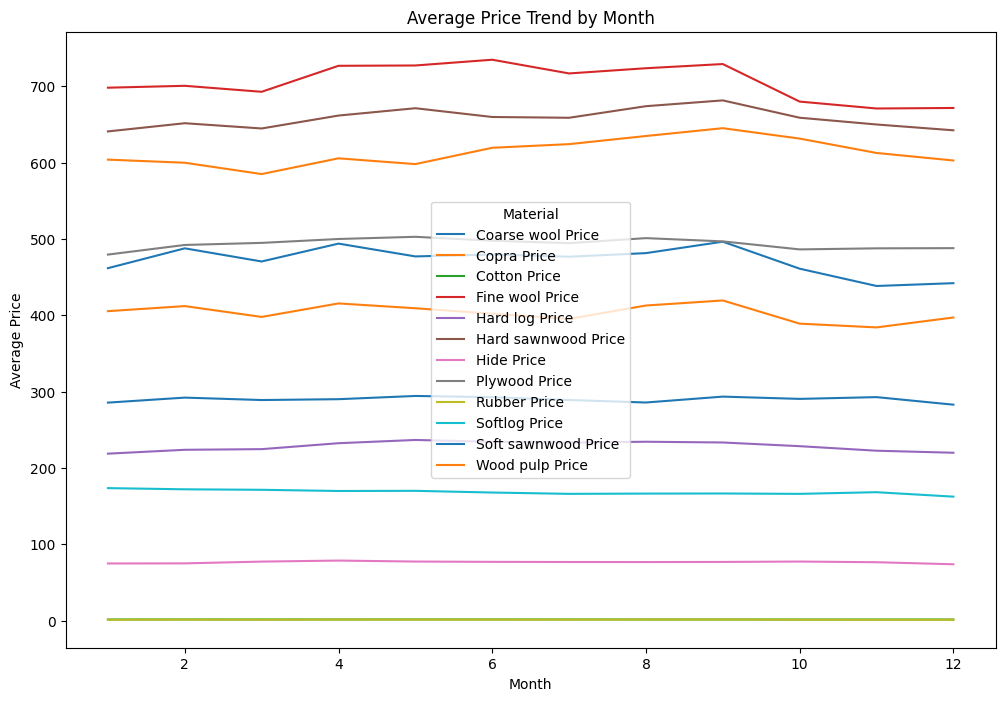

In [ ]:
# Convert 'Month' column to datetime with the correct format
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')
monthly_avg_price = data.groupby(data['Month'].dt.month)[price_columns].mean()

# Plotting monthly price trends
monthly_avg_price.plot(figsize=(12, 8))
plt.title("Average Price Trend by Month")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.legend(title='Material', loc='best')
plt.show()


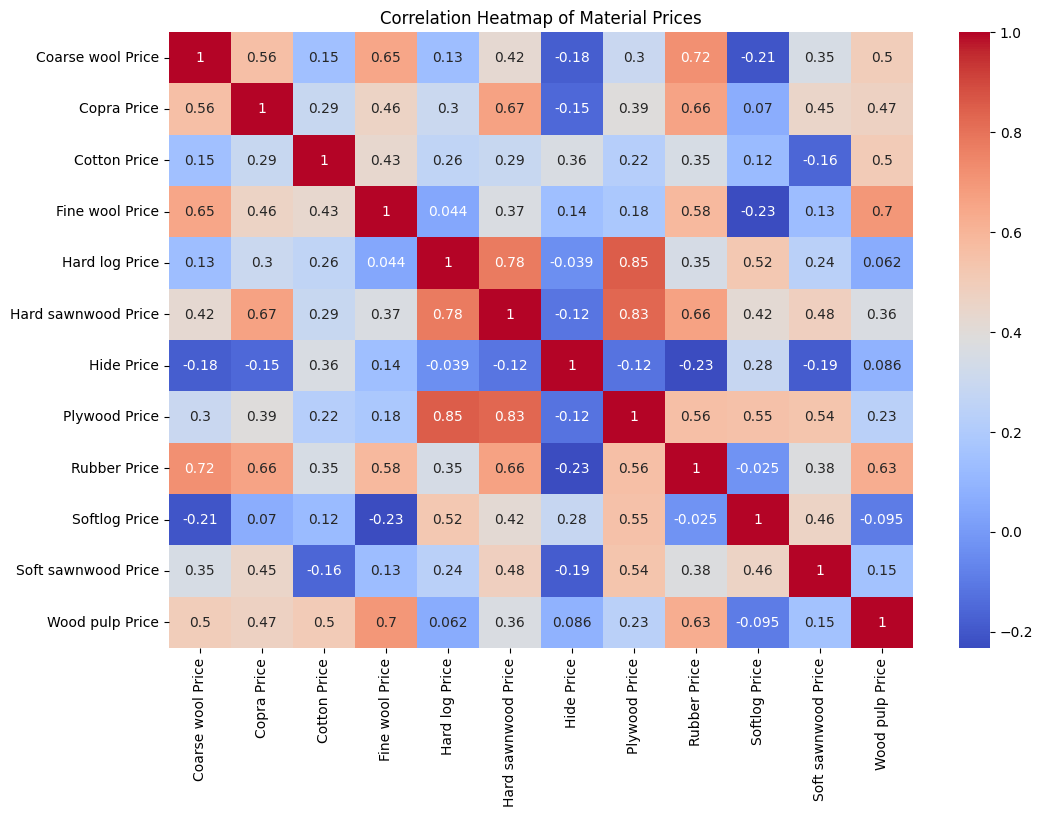

In [ ]:
# Calculate correlation matrix
correlation_matrix = data[price_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Material Prices")
plt.show()
